In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio


In [7]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<h1>Data Pre-Processing</h1>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

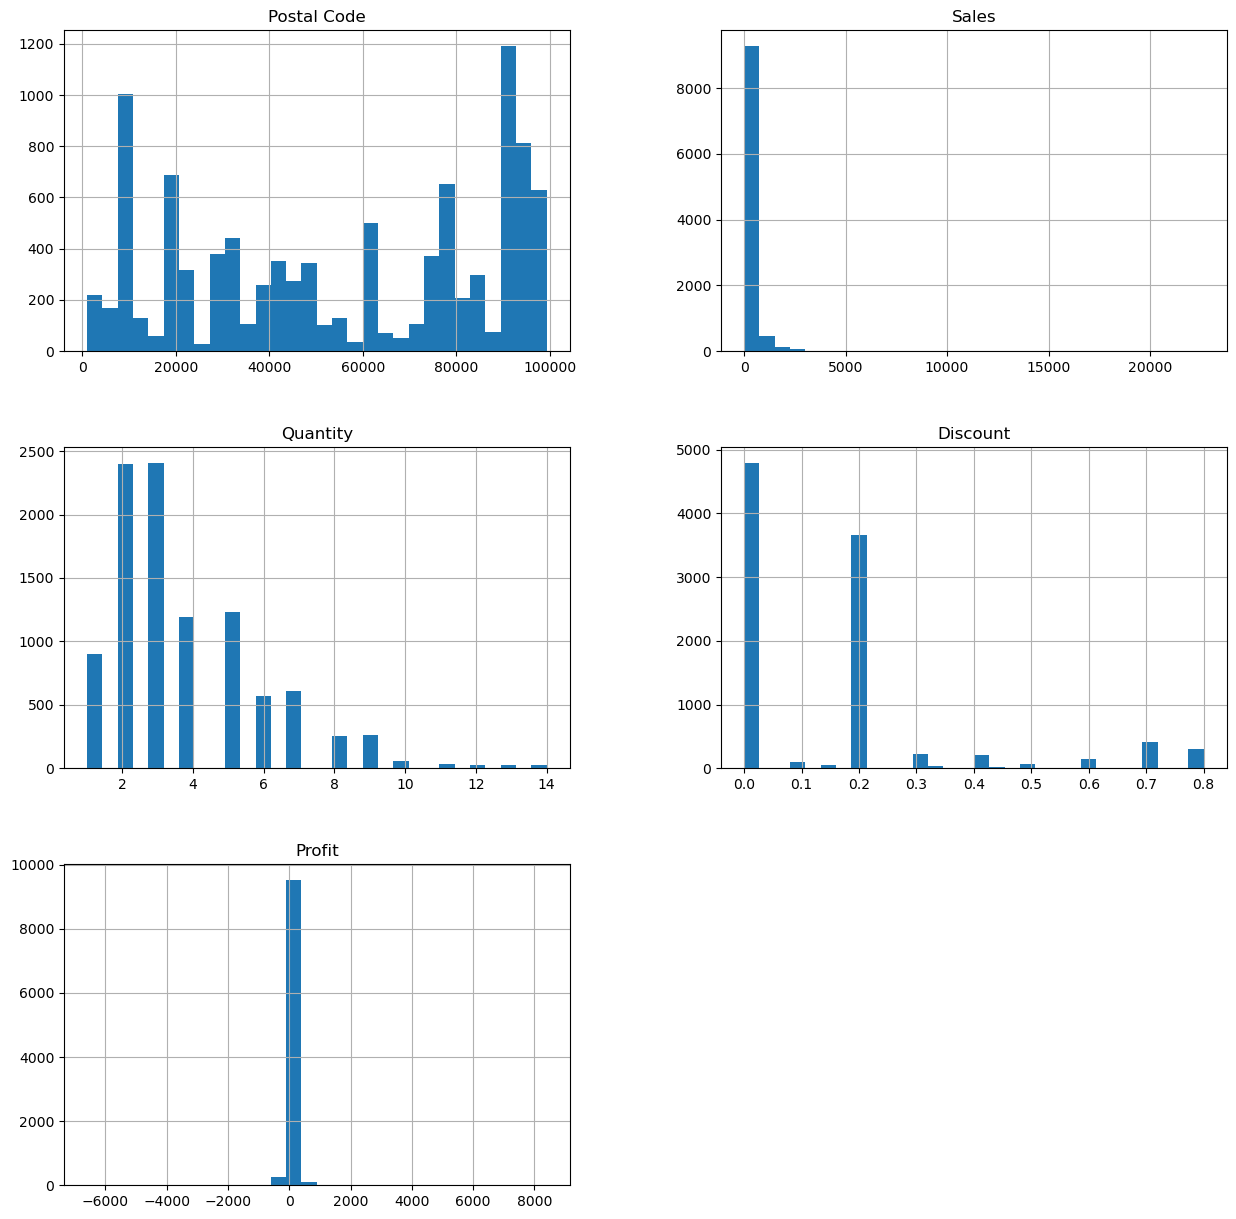

In [8]:
df.hist(bins=30,figsize=(15,15))

Categories and Sub-Categories

In [ ]:
for i in df['Category'].unique():
    print("{}:{}".format(i,df['Sub-Category'][df['Category']==i].unique()))
    print('\n')

Furniture:['Bookcases' 'Chairs' 'Tables' 'Furnishings']


Office Supplies:['Labels' 'Storage' 'Art' 'Binders' 'Appliances' 'Paper' 'Envelopes'
 'Fasteners' 'Supplies']


Technology:['Phones' 'Accessories' 'Machines' 'Copiers']




Drop Postal Code


In [9]:
df.drop(['Postal Code'],inplace=True,axis=1)

In [10]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Share of each Category

In [ ]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Share of each Sub-Category

In [ ]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Type of regions

In [ ]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Type of Shipping Modes

In [ ]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

No of countries

In [ ]:
df['Country'].unique()

array(['United States'], dtype=object)

Type of Cities

In [ ]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

Type of State

In [ ]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

Total Number of Null values

In [ ]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Duplicate values in dataset

In [11]:
df.duplicated().sum()

50

Removing Duplicate values in dataset

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(9944, 12)

<h1>Correlation</h1><br>
Correlation among columns

In [ ]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


Sub-Category vs Category


<BarContainer object of 9944 artists>

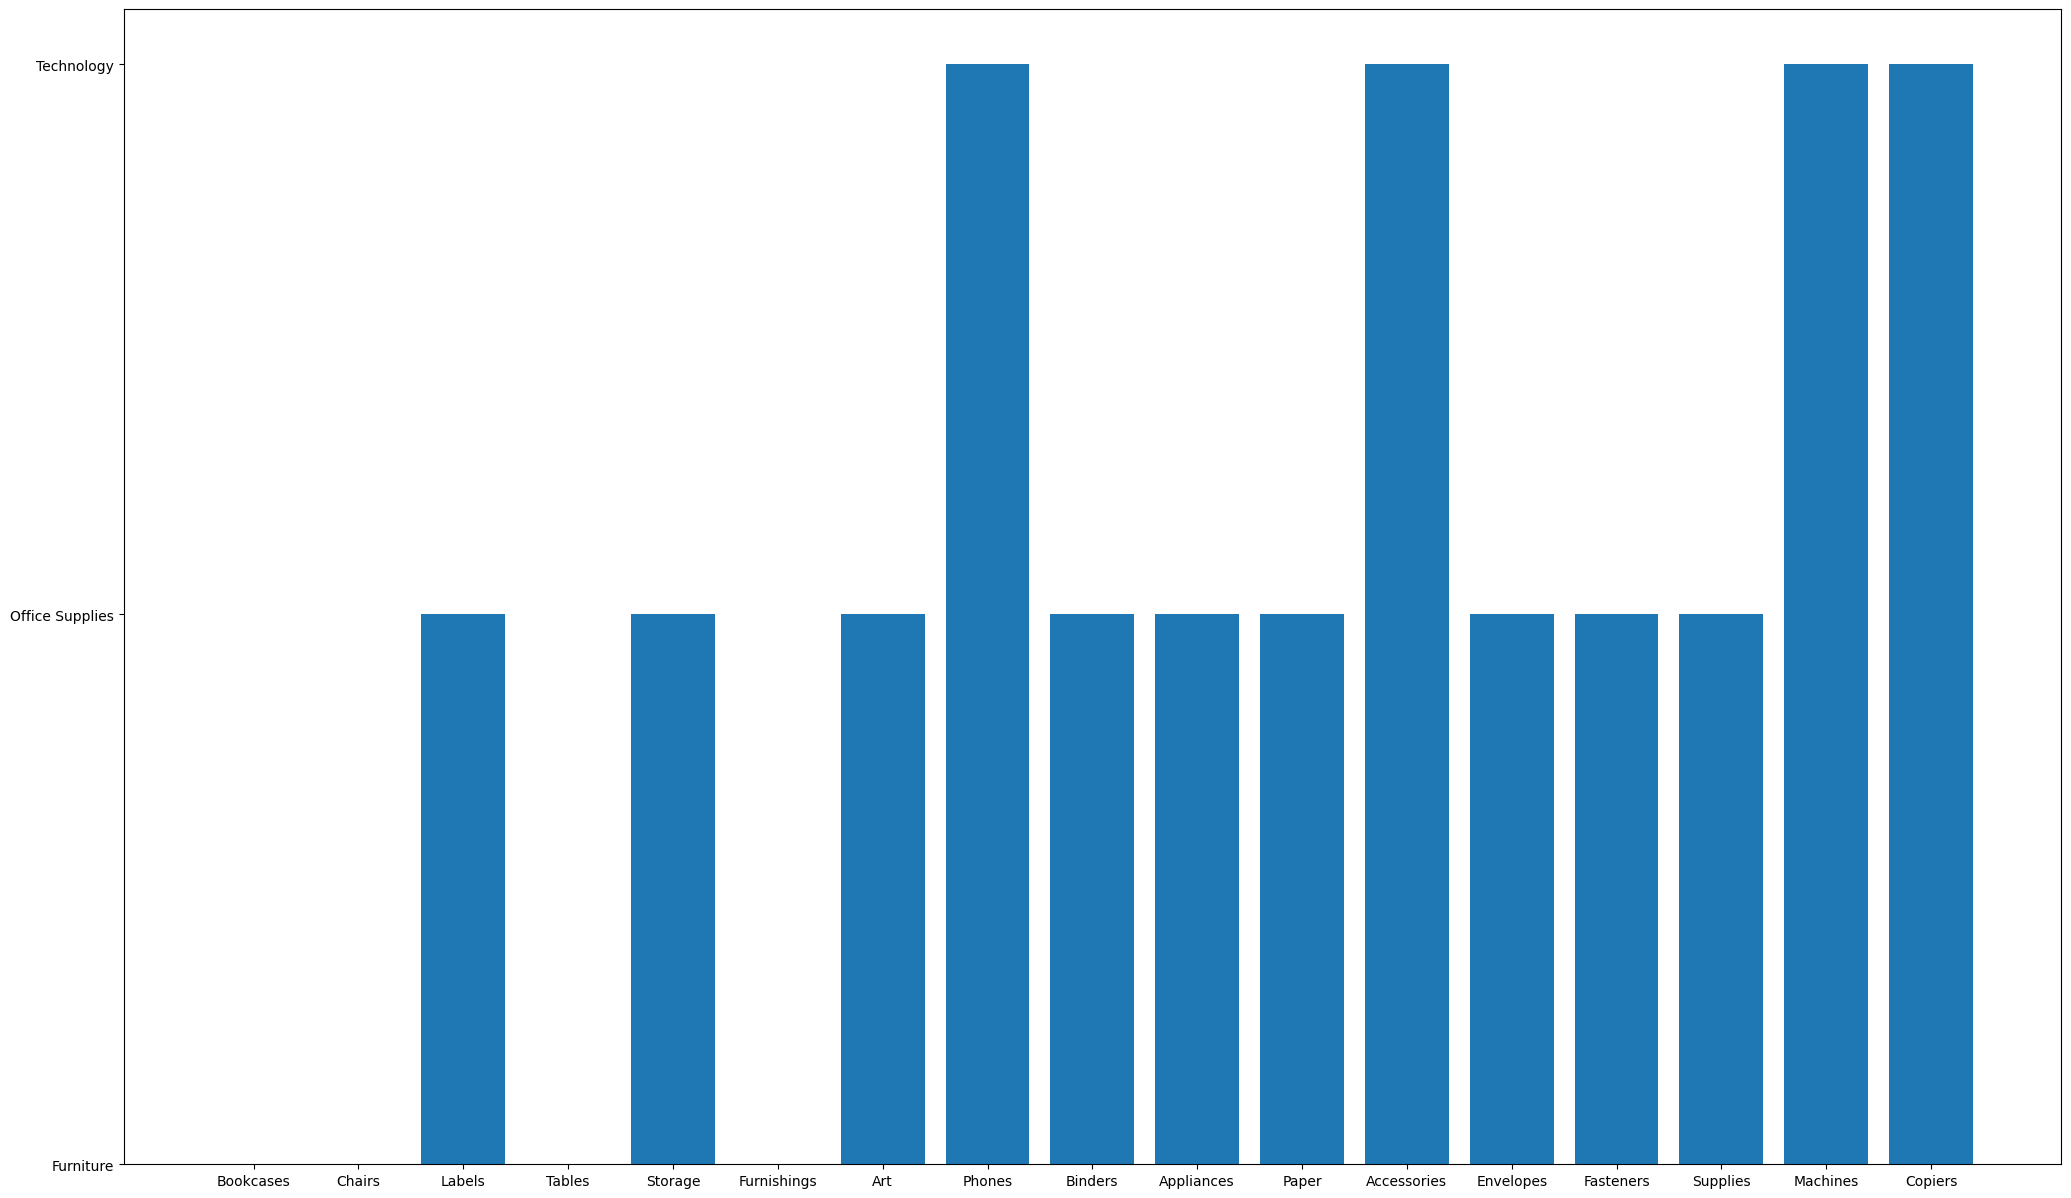

In [ ]:
plt.figure(figsize=(25,15))
plt.bar('Sub-Category','Category',data=df)


Pie Char for Percentage Share of every Sub-Category

<AxesSubplot:ylabel='Sub-Category'>

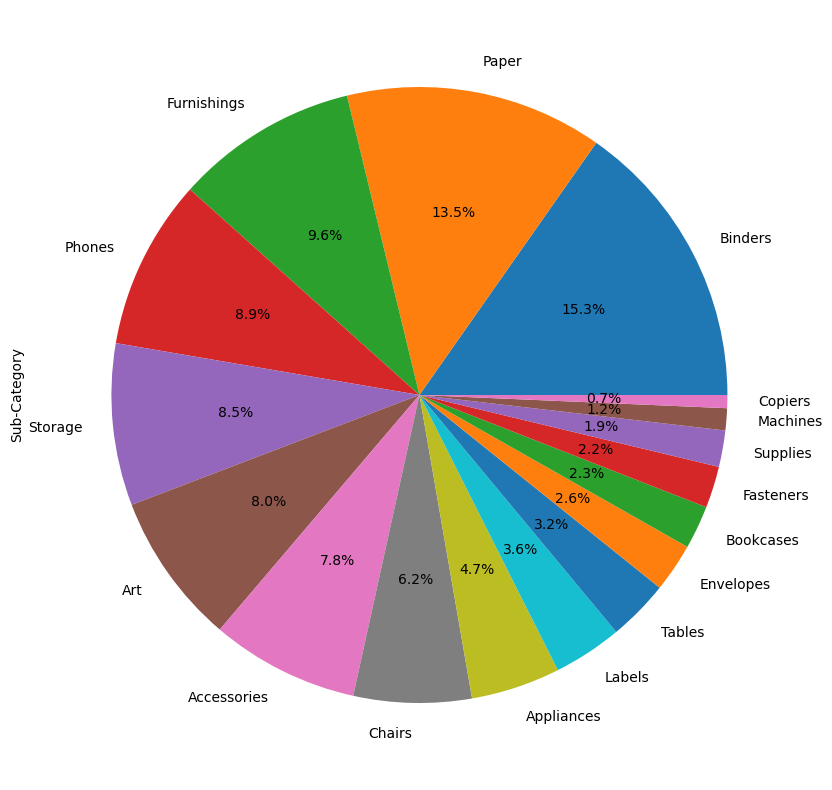

In [ ]:
plt.figure(figsize=(15,10))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')

Bar plot Sales vs profit

C:\Users\dsai9\AppData\Local\Temp\ipykernel_4028\1375686041.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df=df.groupby(by='Category')['Sales','Profit'].sum()


<AxesSubplot:xlabel='Category'>

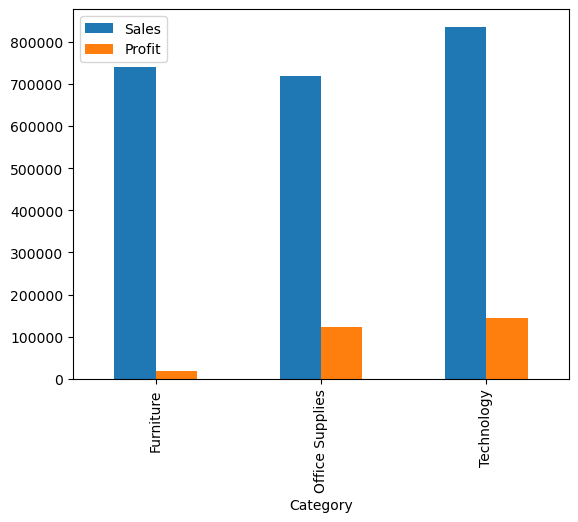

In [19]:
grouped_df=df.groupby(by='Category')['Sales','Profit'].sum()
grouped_df.plot.bar()

In [20]:
grouped_df['Profit per Sale']=(grouped_df['Profit']/grouped_df['Sales'])*100
px.bar(grouped_df,y='Profit per Sale',title='Category VS Profit per Sale')

Bar plot Sub-Category sales and profit

In [21]:
grouped_df=df.groupby(by='Sub-Category')['Sales','Profit'].sum()
px.bar(grouped_df,barmode='group',title='Profit and Sales per Sub-Category')

C:\Users\dsai9\AppData\Local\Temp\ipykernel_4028\970602075.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [22]:
grouped_df=df.groupby(by='Sub-Category')['Profit','Sales'].sum()
grouped_df['Profit per Sale']=(grouped_df['Profit']/grouped_df['Sales'])*100
px.bar(grouped_df,y=grouped_df['Profit per Sale'],title='Sub-Category vs Profit per Sale')

C:\Users\dsai9\AppData\Local\Temp\ipykernel_4028\1105041437.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Sales and Proft Region wise

In [23]:
grouped_df=df.groupby(by='Region')['Profit','Sales'].sum()
px.bar(grouped_df,barmode='group',title='Profit and Sales per Region')

C:\Users\dsai9\AppData\Local\Temp\ipykernel_4028\2407628512.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [24]:
grouped_df['Profit per Sale']=(grouped_df['Profit']/grouped_df['Sales'])*100
px.bar(grouped_df,y='Profit per Sale',title='Region vs Profit per Sale')

<h3>Segment analysis</h3>

Count plot

In [25]:
px.bar(df['Segment'].value_counts(),title='Segment Count Plot')

Profit and Sales from each Segment

In [26]:
grouped_df=df.groupby(by='Segment')['Profit','Sales'].sum()
px.bar(grouped_df,barmode='group',title='Profit and Sales per Region')

C:\Users\dsai9\AppData\Local\Temp\ipykernel_4028\3870188940.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Profit per Sale 

In [27]:
grouped_df['Profit per Sale']=(grouped_df['Profit']/grouped_df['Sales'])*100
px.bar(grouped_df['Profit per Sale'],title='Segment vs Profit per Sale')

<h3>Shipping Mode</h3>

In [28]:
grouped_df=df.groupby(by='Ship Mode')['Profit','Sales'].sum()
px.bar(grouped_df,barmode='group',title='Profit and Sales per Shipping Mode')



C:\Users\dsai9\AppData\Local\Temp\ipykernel_4028\2324020810.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [29]:
grouped_df['Profit per Sale']=(grouped_df['Profit']/grouped_df['Sales'])*100
px.bar(grouped_df,y='Profit per Sale',title='Ship Mode vs Profit per Sale')

Conclusion

Furniture category provide one of least profit per sale measure when compared to others<br>
The store offers wide range of products. Papers and binders are more frequent<br>
Bookcases, Supplies, Tables provide negative profit per sale. It is recommended to discontinue them.<br>
Machines sub-category report very less profit per sale when compared to others.<br>
Sales volume and Profit per sale are less from Central and South regions<br>
Even though there is huge difference in Sales volume of Consumer and Corporate segment. Profit per sale is realtively equivalent. Hence it would be a better strategy to expand corporate clientele while serving consumer segment.<br>
Home office segment has one of the least sales volume when compared to other segments. But it contributes greater profit per sale than any other segment. Increasing Home office clientele will drive growth for the superstore.<br>
All shipment mode report equivalent profit per sale numbers. No need to discontinue any shipment mode.<br>
